# Static Magnetic Fields In General Relativity by Bonner
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

There are several metrics in this paper: 3.1, 3.4, 4.3 and 4.4  Here we concentrate on 4.3 and will return to the others at a later time.

https://iopscience.iop.org/article/10.1088/0370-1298/67/3/305/meta

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,z,dt,dr,dtheta,dz = symbols( 't r theta z dt dr dtheta dz' ) 

In [4]:
Lambda = Function('lambda')(r)
Lambda

In [5]:
mu = Function('mu')(r)
mu

In [6]:
rho = Function('rho')(r)
rho

In [7]:
variables = Matrix( [t,r,theta,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dr,dtheta,dz] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣  dz  ⎦

In [9]:
lineElement = expand(-exp(Lambda)*dz**2 - exp(mu) * (dr**2 + r**2 * dtheta**2) + exp(rho) * dt**2 ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ ρ(r)                           ⎤
⎢ℯ        0         0        0   ⎥
⎢                                ⎥
⎢         μ(r)                   ⎥
⎢  0    -ℯ          0        0   ⎥
⎢                                ⎥
⎢                 2  μ(r)        ⎥
⎢  0      0     -r ⋅ℯ        0   ⎥
⎢                                ⎥
⎢                            λ(r)⎥
⎣  0      0         0      -ℯ    ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ ρ(r)                           ⎤
⎢ℯ        0         0        0   ⎥
⎢                                ⎥
⎢         μ(r)                   ⎥
⎢  0    -ℯ          0        0   ⎥
⎢                                ⎥
⎢                 2  μ(r)        ⎥
⎢  0      0     -r ⋅ℯ        0   ⎥
⎢                                ⎥
⎢                            λ(r)⎥
⎣  0      0         0      -ℯ    ⎦

In [13]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t z r theta")
t,z,r,theta = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                        ⎡ -μ(r)  ρ(r) d                    
⎢                                                        ⎢ℯ     ⋅ℯ    ⋅──(ρ(r))             
⎢                                                        ⎢             dr                   
⎢                                                        ⎢─────────────────────      0      
⎢                                                        ⎢            2                     
⎢                                                        ⎢         2⋅r                      
⎢⎡             d          ⎤  ⎡0     0         0      0⎤  ⎢                                  
⎢⎢             ──(ρ(r))   ⎥  ⎢                        ⎥  ⎢                        d         
⎢⎢             dr         ⎥  ⎢             d          ⎥  ⎢                       -──(μ(r))  
⎢⎢   0      0  ────────  0⎥  ⎢             ──(μ(r))   ⎥  ⎢                        dr        
⎢⎢                2       ⎥  ⎢             dr         ⎥  ⎢          0 

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛                                  2         2                   ⎞                         
⎢⎜  d        d            ⎛d       ⎞         d            d       ⎟  -μ(r) + ρ(r)           
⎢⎜r⋅──(λ(r))⋅──(ρ(r)) + r⋅⎜──(ρ(r))⎟  + 2⋅r⋅───(ρ(r)) - 2⋅──(ρ(r))⎟⋅ℯ                       
⎢⎜  dr       dr           ⎝dr      ⎠          2           dr      ⎟                         
⎢⎝                                          dr                    ⎠                         
⎢────────────────────────────────────────────────────────────────────────────────           
⎢                                         3                                                 
⎢                                      4⋅r                                                  
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                       ⎛   
⎢                                                                                       ⎜  ⎛
⎢⎛                                  2         2                   ⎞                     ⎜r⋅⎜
⎢⎜  d        d            ⎛d       ⎞         d            d       ⎟  -μ(r) + ρ(r)       ⎜  ⎝
⎢⎜r⋅──(λ(r))⋅──(ρ(r)) + r⋅⎜──(ρ(r))⎟  + 2⋅r⋅───(ρ(r)) - 2⋅──(ρ(r))⎟⋅ℯ               0.5⋅⎜───
⎢⎜  dr       dr           ⎝dr      ⎠          2           dr      ⎟                     ⎜   
⎢⎝                                          dr                    ⎠                     ⎝   
⎢──────────────────────────────────────────────────────────────────────────────── - ────────
⎢                                         3                                                 
⎢                                      4⋅r                                                  
⎢                                                                     

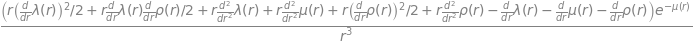

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                ⎡0  0  0  0
⎢                                                                                ⎢          
⎢                                                                                ⎢0  0  0  0
⎢                                                                                ⎢          
⎢                                                                     

In [22]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

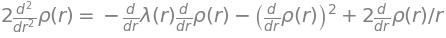

In [38]:
d2rhodr2 = Eq(2*diff(rho,r,r),2*expand( solve( expand((1/(2*r))*Ric.tensor()[0,0].args[2]) , diff(rho,r,r) )[0] ) )
d2rhodr2

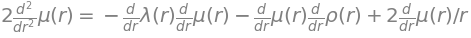

In [39]:
d2mudr2 = Eq(2*diff(mu,r,r),2*expand(solve( Ric.tensor()[1,1] , diff(mu,r,r) )[0] ))
d2mudr2 

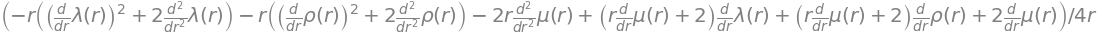

In [40]:
Ric.tensor()[2,2]

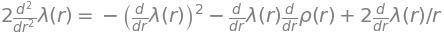

In [48]:
d2lambdadr2 = Eq( 2*diff(Lambda,r,r), 2*expand( solve( Ric.tensor()[3,3].args[2] , diff(Lambda,r,r) )[0] ) )
d2lambdadr2

In [50]:
vacuumFieldEquations = Matrix([d2lambdadr2,d2mudr2,d2rhodr2])
vacuumFieldEquations

⎡                                                       d          ⎤
⎢       2                     2                       2⋅──(λ(r))   ⎥
⎢      d            ⎛d       ⎞    d        d            dr         ⎥
⎢   2⋅───(λ(r)) = - ⎜──(λ(r))⎟  - ──(λ(r))⋅──(ρ(r)) + ──────────   ⎥
⎢       2           ⎝dr      ⎠    dr       dr             r        ⎥
⎢     dr                                                           ⎥
⎢                                                                  ⎥
⎢                                                          d       ⎥
⎢    2                                                   2⋅──(μ(r))⎥
⎢   d            d        d          d        d            dr      ⎥
⎢2⋅───(μ(r)) = - ──(λ(r))⋅──(μ(r)) - ──(μ(r))⋅──(ρ(r)) + ──────────⎥
⎢    2           dr       dr         dr       dr             r     ⎥
⎢  dr                                                              ⎥
⎢                                                                  ⎥
⎢                                 